# Análisis espectral de señales deterministas

* Este cuaderno jupyter es parte de una [colección de cuadernos] (../ index.ipynb) sobre varios temas del procesamiento de señal digital. Dirija sus preguntas y sugerencias a [Sascha.Spors@uni-rostock.de] (mailto: Sascha.Spors@uni-rostock.de). *


## Funciones de ventana

Para la discusión del efecto de fuga en la [sección anterior] (leakage_effect.ipynb), un truncamiento duro de la señal $ x [k] $ por una ventana rectangular $ w [k] = \ text {rect} _N [k] $ fue asumido. También se utilizan otras funciones de ventana para el análisis espectral. Las propiedades resultantes dependen del espectro $ W (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) $ de la función de ventana, ya que el espectro de la señal en ventana viene dado por convolución periódica $ X_N (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) = \ frac {1} {2 \ pi} X (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) \ circledast W (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) $. Para una señal exponencial $ x [k] = \ mathrm {e} ^ {\ mathrm {j} \ Omega_0 k} $ esta operación dará como resultado un desplazamiento cíclico del espectro de la función de ventana $ W (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) $ por $ \ Omega_0 $.

Las diferentes funciones de ventana tienen diferentes propiedades. Por ejemplo, con respecto a la capacidad de distinguir dos señales vecinas (resolución de frecuencia) o detectar dos señales cuando una es mucho más débil (nivel de lóbulo lateral). Dado que estos dos aspectos contrarrestan las funciones típicas de la ventana, la elección de una ventana adecuada depende en gran medida de la aplicación. Primero se observan las funciones de ventana que se aplican con frecuencia y sus propiedades espectrales. Luego, las funciones de la ventana se comparan con las métricas de evaluación comúnmente utilizadas.

Para investigar las ventanas, se define una función que computa y traza el espectro de magnitud de una función de ventana dada. La transformada de Fourier en tiempo discreto (DTFT) $ W (\ mathrm {e} ^ {\, \ mathrm {j} \, \ Omega}) $ se aproxima numéricamente por el DFT.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


def dft_window_function(w):
    
    N = len(w)
    
    # DFT of window function
    W = np.fft.fft(w, 8192)
    W = np.fft.fftshift(W)
    W = W / np.amax(W) + np.nextafter(0,1)
    mu = np.linspace(-np.pi, np.pi, 8192)

    # plot window function and its spectrum
    plt.rcParams['figure.figsize'] = 10, 5
    plt.stem(w, basefmt=' ')
    plt.xlabel(r'$k$')
    plt.ylabel(r'$w[k]$')
    plt.axis([-1, N+1, -0.1, 1.1])
    plt.grid()

    plt.figure()
    plt.plot(mu, 20*np.log10(np.abs(W)))
    #plt.plot(mu, np.abs(W))
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$| W(e^{j \Omega}) |$ in dB')
    plt.axis([-np.pi, np.pi, -100, 5])
    plt.grid()

### Ventana rectangular

La [ventana rectangular] (https://en.wikipedia.org/wiki/Window_function#Rectangular_window) $ w [k] = \ text {rect} _N [k] $ toma en cuenta todas las muestras con el mismo peso. El lóbulo principal de su espectro de magnitud es estrecho, pero el nivel de los lóbulos laterales es bastante alto. Tiene la selectividad de frecuencia más alta.

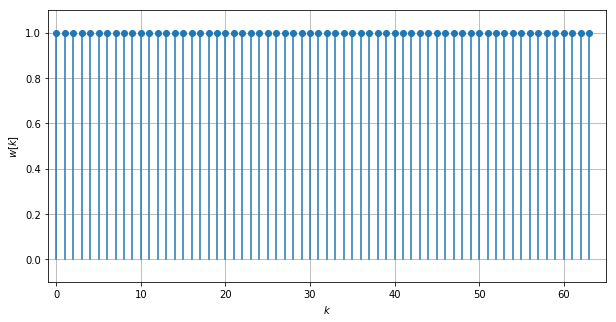

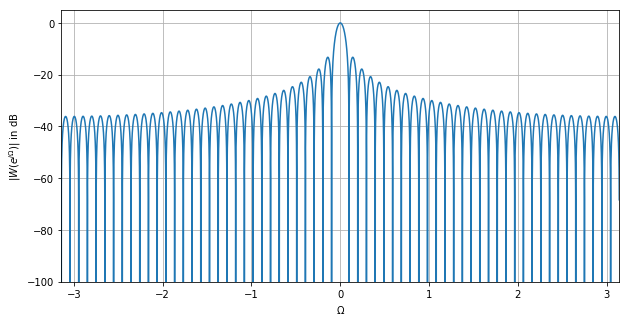

In [3]:
dft_window_function(np.ones(64))

### Ventana triangular

Para una longitud de ventana impar $ 2N - 1 $, la [ventana triangular] (https://en.wikipedia.org/wiki/Window_function#Triangular_window) se puede expresar como la convolución de dos ventanas rectangulares $ w [k] = \ texto {rect} _N [k] * \ text {rect} _N [k] $. El lóbulo principal es más ancho que para la ventana rectangular, pero el nivel de los lóbulos laterales decae más rápido.

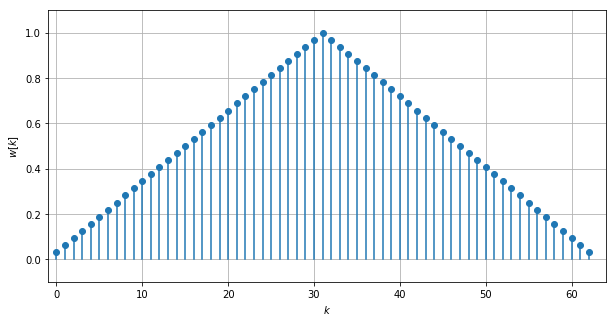

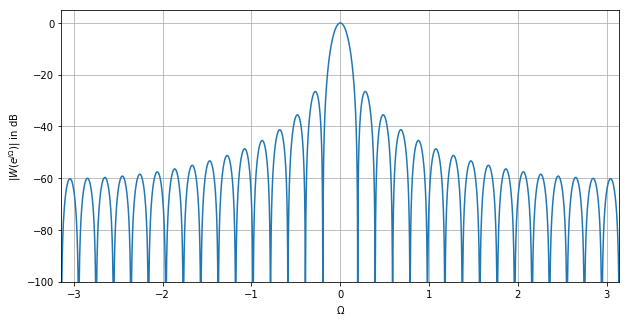

In [4]:
dft_window_function(sig.triang(63))

### Ventana Hanning 

La [ventana de Hanning] (https://en.wikipedia.org/wiki/Window_function#Hann_.28Hanning.29_window) $ w [k] = \ frac {1} {2} (1 - \ cos (2 \ pi \ frac {k} {N})) $ es una ventana suave cuyo primer y último valor es cero. Presenta una rápida descomposición de los lóbulos laterales.

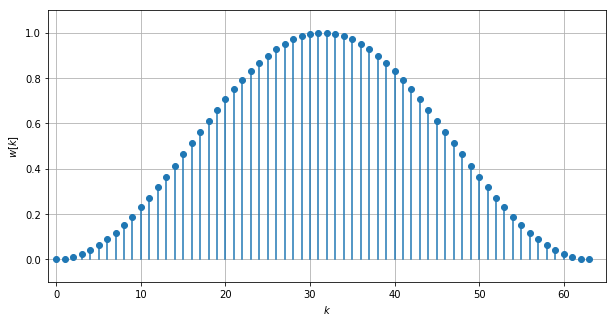

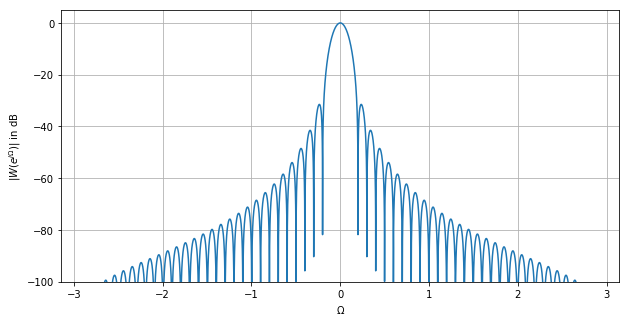

In [5]:
dft_window_function(np.hanning(64))

### Ventana Hamming 

La [ventana de Hamming] (https://en.wikipedia.org/wiki/Window_function#Hamming_window) $ w [k] = 0.54 - 0.46 \ cos (2 \ pi \ frac {k} {N}) $ es un suave función de ventana cuyo primer y último valor no es cero. El nivel de los lóbulos laterales es aproximadamente constante.

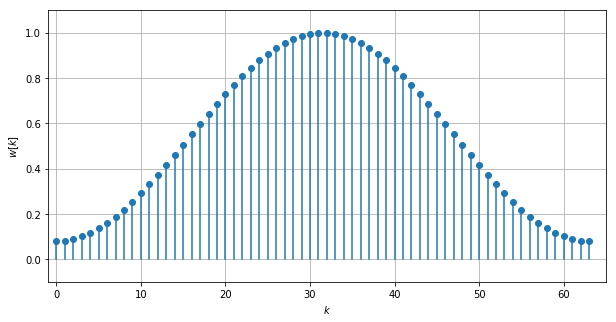

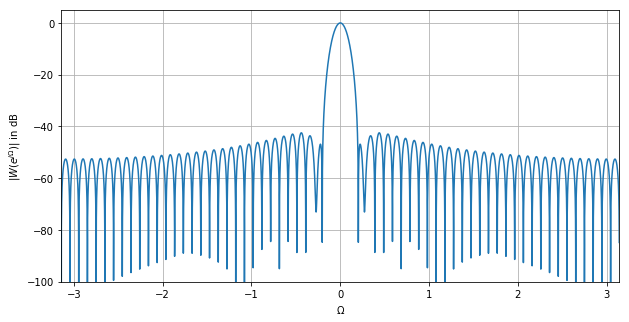

In [6]:
dft_window_function(np.hamming(64))

### Ventana Blackman 

La [ventana de Blackman] (https://en.wikipedia.org/wiki/Window_function#Blackman_windows) $ w [k] = 0.42 - 0.5 \ cos (2 \ pi \ frac {k} {N}) + 0.08 \ cos (4 \ pi \ frac {k} {N}) $ presenta una rápida disminución de los lóbulos laterales a costa de un lóbulo principal ancho y una selectividad de baja frecuencia.


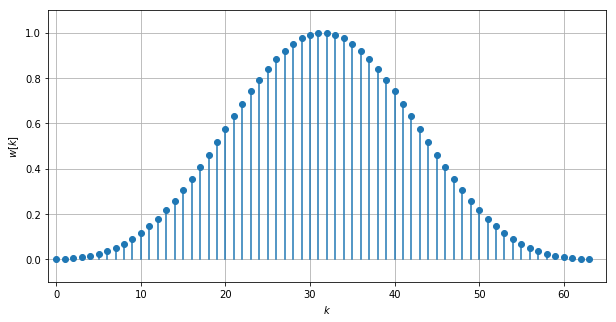

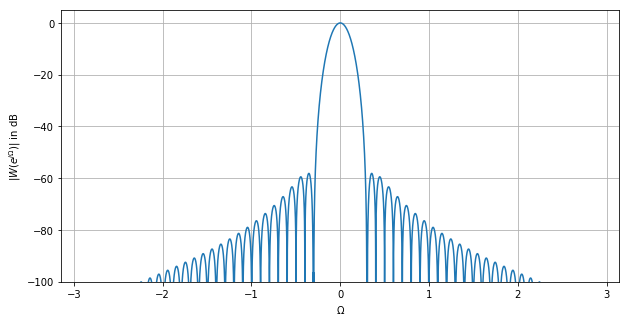

In [7]:
dft_window_function(np.blackman(64))

### Comparación de funciones de ventana

Además de inspeccionar la DTFT de las funciones de la ventana, también se utilizan varias métricas de evaluación para comparar o seleccionar funciones de la ventana. Tres de las medidas más destacadas en el análisis espectral son

1. **Ancho del lóbulo principal**:
El ancho del lóbulo principal en términos de frecuencia normalizada se mide entre los dos puntos donde su valor máximo se reduce a la mitad (- 3dB). Esta medida está vinculada a la capacidad de detectar dos señales exponenciales con niveles comparables y frecuencias similares.

2. **Amplitud relativa de los lóbulos laterales**:
Relación en términos de amplitud entre el máximo del lóbulo principal y el nivel máximo de los lóbulos laterales. Esta medida está vinculada al rendimiento de detección cuando hay presentes dos o más señales exponenciales con niveles dispares y frecuencias diferentes.

3. **Error de muestreo máximo**:
Error de amplitud máxima cuando no se alcanza el máximo del lóbulo principal al muestrear el espectro. Se define como la relación entre la amplitud del lóbulo principal y la amplitud en $ \ Omega = \ frac {\ pi} {N} $. Esta medida proporciona información sobre el error máximo posible al extraer la amplitud de las señales armónicas de su DFT.

La siguiente tabla enumera los valores de estas métricas para las funciones de ventana introducidas:

| window function | main lobe width | side lobe level | sampling error |
|---|:---:|:---:|:---:|
| [rectangular](#Rectangular-Window) | $\frac{4 \pi}{N + 1}$ | - 13 dB | 3.92 dB |
| [triangular](#Triangular-Window) | $\frac{8 \pi}{N}$ | - 25 dB | 1.82 dB |
| [Hanning](#Hanning-Window) | $\frac{8 \pi}{N}$ | - 31 dB | 1.42 dB |
| [Hamming](#Hamming-Window) | $\frac{8 \pi}{N}$ | - 41 dB | 1.78 dB |
| [Blackman](#Blackman-Window) | $\frac{12 \pi}{N}$ | - 57 dB | 1.10 dB |

Es evidente en la tabla que un nivel de lóbulo lateral inferior tiene un lóbulo principal más ancho como consecuencia.

### Análisis de mezclas de señales mediante la transformación de Fourier discreta en ventanas

El análisis de las mezclas de señales por el DFT con ventana se ilustra mediante ejemplos numéricos. Para este propósito, la función para el análisis de una [superposición de dos señales exponenciales de la sección anterior] (leakage_effect.ipynb # Análisis-de-mezclas-de-señales-por-la-discreta-transformación de Fourier) se extiende mediante la ventana señal antes de tomar su DFT.


In [8]:
def dft_signal_mixture_window(N, A1, P1, A2, P2, w):
    # N: length of signal/DFT
    # A1, P1, A2, P2: amplitude and periodicity of 1st/2nd complex exponential
    # window applied to the signal
    
    # generate the signal mixture
    Om0_1 = P1*(2*np.pi/N)  # frequency of 1st exponential signal
    Om0_2 = P2*(2*np.pi/N)  # frequency of 2nd exponential signal
    k = np.arange(N)
    x = A1 * np.exp(1j*Om0_1*k) + A2 * np.exp(1j*Om0_2*k)
    x = x * w

    # DFT of the signal mixture
    mu = np.arange(N)
    X = np.fft.fft(x)

    # plot spectrum
    plt.figure(figsize = (10, 8))
    plt.stem(mu, abs(X), basefmt = ' ')
    plt.title(r'Absolute value of the DFT of a signal mixture')
    plt.xlabel(r'$\mu$')
    plt.ylabel(r'$|X[\mu]|$')
    plt.axis([0, N, -0.5, abs(X).max()+5])
    plt.grid()

Ahora, el último ejemplo se vuelve a investigar mediante el uso de una ventana Blackman que presenta una alta supresión de los lóbulos laterales.

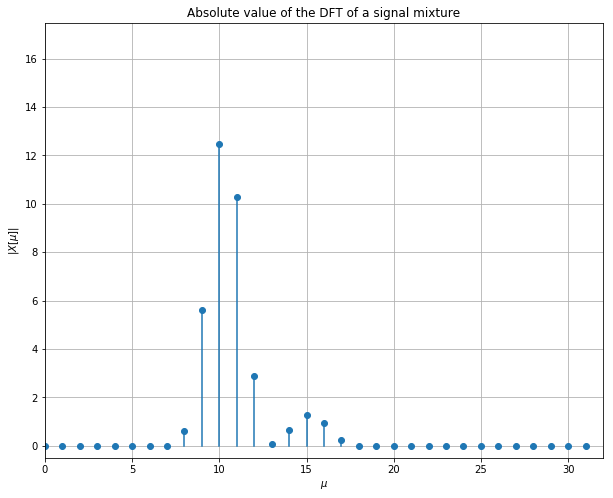

In [9]:
dft_signal_mixture_window(32, 1, 10.3, 0.1, 15.2, np.blackman(32))

La segunda señal exponencial con el nivel inferior ahora se hace visible en el espectro.

**Ejercicio**

* Examine el efecto de las otras funciones de la ventana para detectar pequeñas / grandes frecuencias y diferencias de nivel. ¿Qué función de ventana es la más adecuada para cada situación?

Solución: La función de ventana rectangular es adecuada para identificar dos o más señales exponenciales con amplitudes comparables y solo diferencias menores en la frecuencia. Esto se debe a su lóbulo principal estrecho. Las funciones de ventana que presentan una mayor desintegración de los lóbulos laterales son muy adecuadas para la identificación de señales exponenciales con niveles y frecuencias bastante diferentes.


La ventana Hamming elimina información innecesaria, minimiza la dispersión espectral y el lóbulo central es más ancho

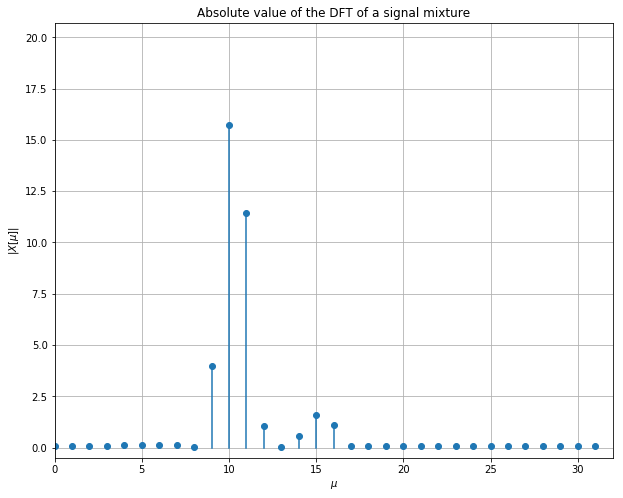

In [10]:
dft_signal_mixture_window(32, 1, 10.3, 0.1, 15.2, np.hamming(32))

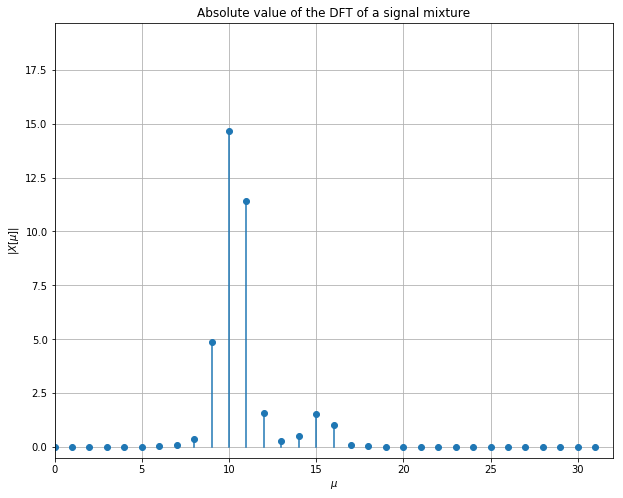

In [11]:
dft_signal_mixture_window(32, 1, 10.3, 0.1, 15.2, np.hanning(32))

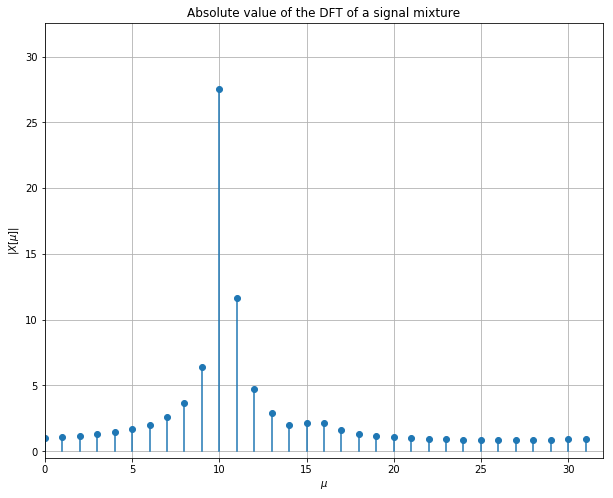

In [12]:
dft_signal_mixture_window(32, 1, 10.3, 0.1, 15.2, np.ones(32))

La ventana Bartlett es una convolución de dos ventanas rectangulares. Al aplicar la ventana triangular observamos como parece que existiese un tercer tono de frecuencia intermedio que en realidad es uno de los lóbulos laterales de la ventana triangular

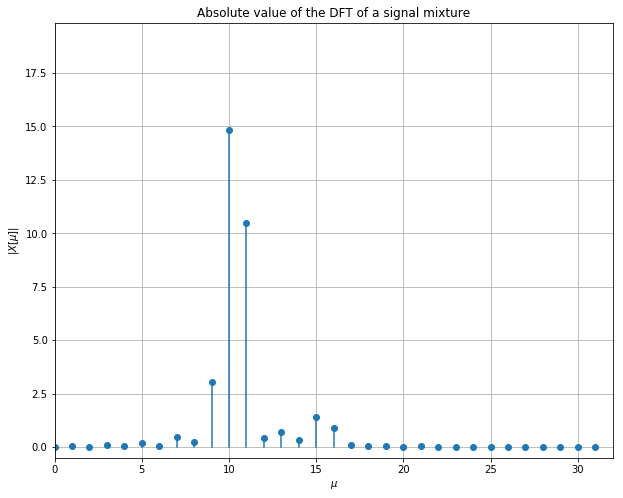

In [13]:
dft_signal_mixture_window(32, 1, 10.3, 0.1, 15.2, sig.triang(32))

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.